Title: Correlating SCZ Organoid Cell Types with Fetal Cells
Author: Fallon Ratner
Date: 23-02-2024

## Setting Up

- Load libraries
- Load dataframes 



## Compare SCZ Organoids to Fetal Cells

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
#select relevant working directory
os.chdir("C:/Users/fallo/OneDrive/Documents/URF_2023/Datasets")

fetal_cells = pd.read_csv("zhong_exp_sig_cells.csv", index_col=0)
# Rename column
fetal_cells['Gene_name'] = fetal_cells['SYMBOL']

notaras_deg = pd.read_csv("notaras_deg_condition.csv")
#skip first row 
sawada_deg = pd.read_csv("sawada_deg_condition.csv", skiprows = 1)

In [28]:
#Sawada selection criteria: log2FC > 0.585 and FDR < 0.01
#Apply this criteria to Notaras DEGs
#Convert logFC to log2FC
notaras_deg['Log2FC'] = np.log2(np.exp(notaras_deg['logFC']))

#subset_notaras_deg <- notaras_deg[notaras_deg$log2FC > 0.585 & notaras_deg$FDR < 0.01, ]
# no genes from notaras meet this critera so changing the FDR threshold to 0.1
subset_notaras_deg = notaras_deg[(notaras_deg['Log2FC'] > 0.585) & (notaras_deg['FDR'] < 0.1)]

In [29]:
# Extract gene names from the data frames
notaras_genes = subset_notaras_deg['Gene_name']
sawada_genes = sawada_deg['Gene_name']
fetal_genes = set(fetal_cells['Gene_name'].dropna())

Log2FC                    1.000000
GW26_GABAergic_neurons   -0.378375
GW23_GABAergic_neurons   -0.361029
GW26_Astrocytes          -0.414890
GW26_Neurons             -0.362602
GW16_Neurons             -0.407599
GW16_GABAergic_neurons   -0.386897
GW10_Neurons             -0.401682
dtype: float64


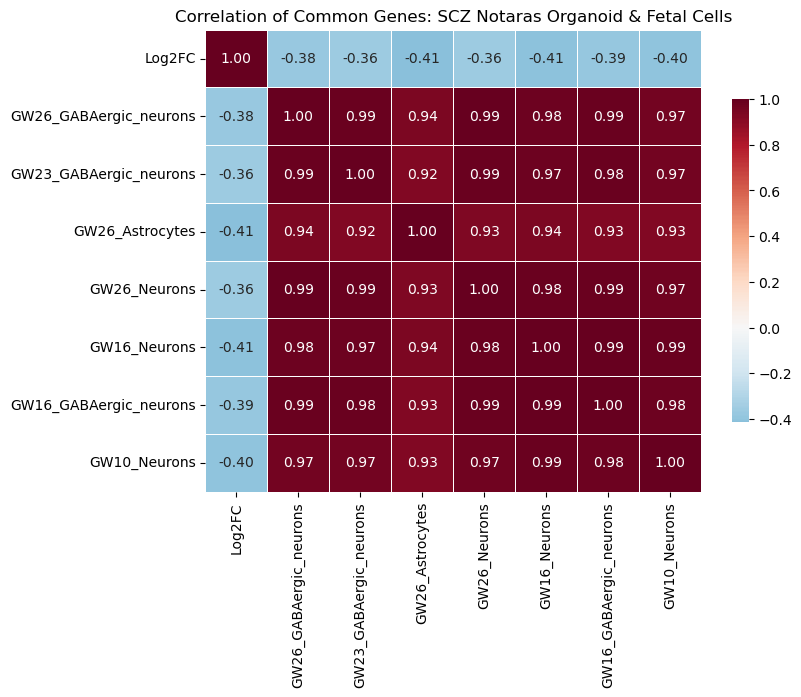

In [30]:
# Find the overlapping genes between notaras and fetal genes
common_genes2 = list(set(notaras_genes).intersection(fetal_genes))

# Subset common genes from 'fetal_cells'
common_genes_fetal_cells = fetal_cells[fetal_cells['Gene_name'].isin(common_genes2)]

# Subset 'subset_notaras_deg' based on common genes
subset_notaras_common = subset_notaras_deg[subset_notaras_deg['Gene_name'].isin(common_genes2)]

# Extract relevant columns for correlation
common_genes_notaras = subset_notaras_common[['Gene_name', 'Log2FC']]
common_genes_fetal_cells_subset = common_genes_fetal_cells[['Gene_name', 'GW26_GABAergic_neurons', 'GW23_GABAergic_neurons', 'GW26_Astrocytes', 'GW26_Neurons', 'GW16_Neurons', 'GW16_GABAergic_neurons', 'GW10_Neurons']]

# Merge the two dataframes on 'Gene_name'
merged_data = pd.merge(common_genes_notaras, common_genes_fetal_cells_subset, on='Gene_name', how='left')

# Convert 'Log2FC' to numeric
merged_data['Log2FC'] = pd.to_numeric(merged_data['Log2FC'], errors='coerce')

# Extract the Log2FC column from the merged data
log2fc_column = merged_data['Log2FC']

# Select only numeric columns (excluding 'Gene_name') for correlation
numeric_data = merged_data.select_dtypes(include=np.number)

# Compute correlation for each cell type
correlations = numeric_data.corrwith(log2fc_column, method='pearson')

# Display or further analyze the correlation results
print(correlations)

# Extract the numeric data for correlation matrix
cor_matrix = numeric_data.corr()

# Set the size of the plotting device
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cor_matrix, 
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": 0.7},
            xticklabels=cor_matrix.columns,
            yticklabels=cor_matrix.columns)

plt.title('Correlation of Common Genes: SCZ Notaras Organoid & Fetal Cells')
plt.show()

Log2FC                    1.000000
GW26_GABAergic_neurons    0.232616
GW23_GABAergic_neurons    0.246076
GW26_Astrocytes           0.030312
GW26_Neurons              0.181323
GW16_Neurons              0.157110
GW16_GABAergic_neurons    0.185680
GW10_Neurons              0.169892
dtype: float64


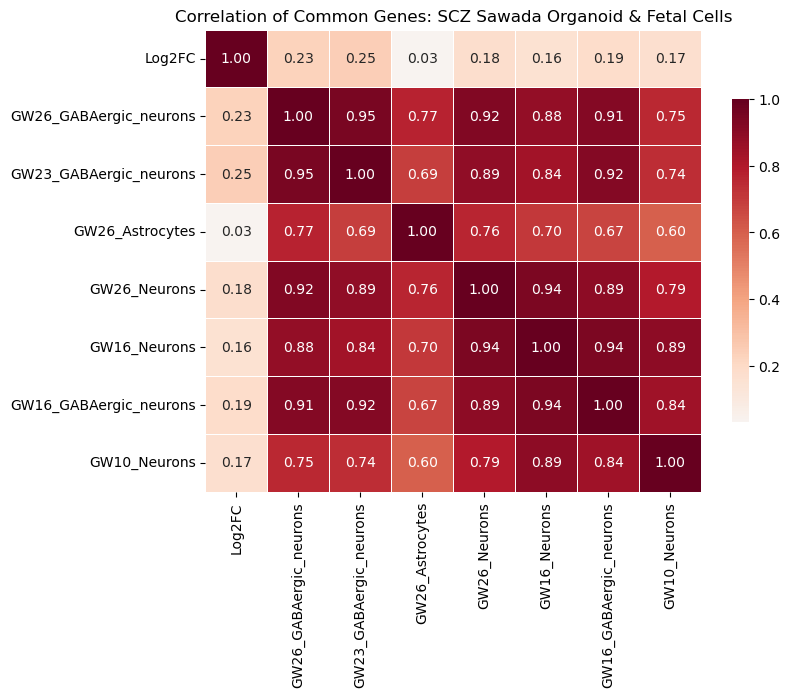

In [31]:
# Find the overlapping genes between notaras and fetal genes
common_genes3 = list(set(sawada_genes).intersection(fetal_genes))

# Subset common genes from 'fetal_cells'
common_genes_fetal_cells2 = fetal_cells[fetal_cells['Gene_name'].isin(common_genes3)]

# Subset sawada based on common genes
subset_sawada_common = sawada_deg[sawada_deg['Gene_name'].isin(common_genes3)]

# Extract relevant columns for correlation
common_genes_sawada = subset_sawada_common[['Gene_name', 'Log2FC']]
common_genes_fetal_cells_subset2 = common_genes_fetal_cells2[['Gene_name', 'GW26_GABAergic_neurons', 'GW23_GABAergic_neurons', 'GW26_Astrocytes', 'GW26_Neurons', 'GW16_Neurons', 'GW16_GABAergic_neurons', 'GW10_Neurons']]

# Merge the two dataframes on 'Gene_name'
merged_data2 = pd.merge(common_genes_sawada, common_genes_fetal_cells_subset2, on='Gene_name', how='left')

# Convert 'Log2FC' to numeric
merged_data2['Log2FC'] = pd.to_numeric(merged_data2['Log2FC'], errors='coerce')

# Extract the Log2FC column from the merged data
log2fc_column = merged_data2['Log2FC']

# Select only numeric columns (excluding 'Gene_name') for correlation
numeric_data = merged_data2.select_dtypes(include=np.number)

# Compute correlation for each cell type
correlations2 = numeric_data.corrwith(log2fc_column, method='pearson')

# Display or further analyze the correlation results
print(correlations2)

# Extract the numeric data for correlation matrix
cor_matrix2 = numeric_data.corr()

# Set the size of the plotting device
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(cor_matrix2, 
            cmap='RdBu_r',
            center=0,
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": 0.7},
            xticklabels=cor_matrix.columns,
            yticklabels=cor_matrix.columns)

plt.title('Correlation of Common Genes: SCZ Sawada Organoid & Fetal Cells')
plt.show()

## Correlate Cell types from Notaras with fetal cell types

In [7]:
notaras_cells = pd.read_csv('notaras_exp_cell_condition.csv', index_col=0)
# Pivot the original dataframe so that cell types are columns along with the cell type and condition
# Melt the original dataframe to have a column called 'SYMBOL' with all of the gene names
melted_notaras = pd.melt(notaras_cells, id_vars=['cell_types', 'conditions'], var_name='Gene_name', value_name='Expression')

# Pivot the melted dataframe so that cell types and conditions are columns
pivot_notaras = melted_notaras.pivot_table(index=['Gene_name'], columns=['cell_types', 'conditions'], values='Expression', aggfunc='first')

# Flatten the column index
pivot_notaras.columns = ['_'.join(map(str, col)).strip() for col in pivot_notaras.columns.values]

pivot_notaras.head()

,Astrocytes_Ctrl,Astrocytes_Scz,Endothelial_Ctrl,Endothelial_Scz,Mural_Ctrl,Mural_Scz,Myeloid_Ctrl,Myeloid_Scz,Neurons_Ctrl,Neurons_Scz,Progs._Ctrl,Progs._Scz,Proliferating_Ctrl,Proliferating_Scz,RG_Ctrl,RG_Scz
Gene_name,,,,,,,,,,,,,,,,
A1BG,0.240185,0.561151,0.393939,0.302632,0.762295,0.968168,0.273438,0.375000,0.215247,0.552198,0.101568,0.272092,0.176728,0.419149,0.352941,0.920042
A1BG-AS1,0.023095,0.007194,0.000000,0.016917,0.042155,0.045646,0.000000,0.006667,0.022920,0.038462,0.006348,0.012574,0.018550,0.036702,0.027718,0.043677
A1CF,0.002309,0.000000,0.000000,0.000000,0.001171,0.001201,0.000000,0.000000,0.000000,0.001374,0.002801,0.004541,0.000000,0.002128,0.004312,0.006692
A2M,0.207852,0.086331,0.242424,0.110902,0.023419,0.004805,0.007812,0.001667,0.004484,0.006868,0.009149,0.009431,0.004047,0.005851,0.010163,0.010567
A2M-AS1,0.013857,0.000000,0.070707,0.016917,0.035129,0.004204,0.000000,0.000000,0.012955,0.008242,0.014003,0.002794,0.021248,0.003723,0.034801,0.011272


In [33]:
# Merge notaras dataframe with transposed fetal dataframe 
merged_df = pd.merge(pivot_notaras, fetal_cells, on='Gene_name', how='outer')
merged_df.head()

,Gene_name,Astrocytes_Ctrl,Astrocytes_Scz,Endothelial_Ctrl,Endothelial_Scz,Mural_Ctrl,Mural_Scz,Myeloid_Ctrl,Myeloid_Scz,Neurons_Ctrl,...,RG_Ctrl,RG_Scz,SYMBOL,GW26_GABAergic_neurons,GW23_GABAergic_neurons,GW26_Astrocytes,GW26_Neurons,GW16_Neurons,GW16_GABAergic_neurons,GW10_Neurons
0,A1BG,0.240185,0.561151,0.393939,0.302632,0.762295,0.968168,0.273438,0.375000,0.215247,...,0.352941,0.920042,A1BG,0.779467,0.468293,0.262848,0.211275,0.465583,0.496411,1.046958
1,A1BG-AS1,0.023095,0.007194,0.000000,0.016917,0.042155,0.045646,0.000000,0.006667,0.022920,...,0.027718,0.043677,A1BG-AS1,0.116426,0.073297,0.121927,0.000000,0.003683,0.037978,0.000000
2,A1CF,0.002309,0.000000,0.000000,0.000000,0.001171,0.001201,0.000000,0.000000,0.000000,...,0.004312,0.006692,A1CF,0.086859,0.038146,0.136653,0.127822,0.056949,0.092920,0.000000
3,A2M,0.207852,0.086331,0.242424,0.110902,0.023419,0.004805,0.007812,0.001667,0.004484,...,0.010163,0.010567,A2M,1.305558,0.961858,1.250862,0.784650,0.782697,0.540116,0.386600
4,A2M-AS1,0.013857,0.000000,0.070707,0.016917,0.035129,0.004204,0.000000,0.000000,0.012955,...,0.034801,0.011272,A2M-AS1,0.188387,0.171537,0.171241,0.291190,0.118549,0.072932,0.120538


In [34]:
#perform the correlation
# Select only the expression value columns (cell types)
expression_values_cells = merged_df.drop(columns='Gene_name')

# Calculate correlation matrix
correlation_matrix_cells = expression_values_cells.corr()

correlation_matrix_cells.head()

C:\Users\fallo\AppData\Local\Temp\ipykernel_3800\574531763.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix_cells = expression_values_cells.corr()


,Astrocytes_Ctrl,Astrocytes_Scz,Endothelial_Ctrl,Endothelial_Scz,Mural_Ctrl,Mural_Scz,Myeloid_Ctrl,Myeloid_Scz,Neurons_Ctrl,Neurons_Scz,...,Proliferating_Scz,RG_Ctrl,RG_Scz,GW26_GABAergic_neurons,GW23_GABAergic_neurons,GW26_Astrocytes,GW26_Neurons,GW16_Neurons,GW16_GABAergic_neurons,GW10_Neurons
Astrocytes_Ctrl,1.000000,0.944535,0.921277,0.970715,0.983300,0.950888,0.409993,0.449880,0.901720,0.966436,...,0.808534,0.991895,0.956453,0.431574,0.445991,0.360678,0.455997,0.407764,0.432452,0.397215
Astrocytes_Scz,0.944535,1.000000,0.847425,0.957154,0.933981,0.973675,0.387797,0.471841,0.793411,0.964691,...,0.815747,0.933475,0.982699,0.403650,0.412715,0.332515,0.426305,0.377387,0.400947,0.364439
Endothelial_Ctrl,0.921277,0.847425,1.000000,0.930529,0.918287,0.852573,0.407673,0.407433,0.953891,0.908268,...,0.728627,0.935267,0.848058,0.411304,0.428064,0.350910,0.434417,0.387507,0.412679,0.381088
Endothelial_Scz,0.970715,0.957154,0.930529,1.000000,0.964744,0.970872,0.408108,0.457975,0.887318,0.981944,...,0.817478,0.976170,0.972393,0.422636,0.434350,0.355910,0.445990,0.397423,0.421771,0.386482
Mural_Ctrl,0.983300,0.933981,0.918287,0.964744,1.000000,0.963552,0.415999,0.452007,0.901051,0.965652,...,0.802902,0.985242,0.957247,0.422445,0.436874,0.359131,0.447470,0.400663,0.424239,0.390729


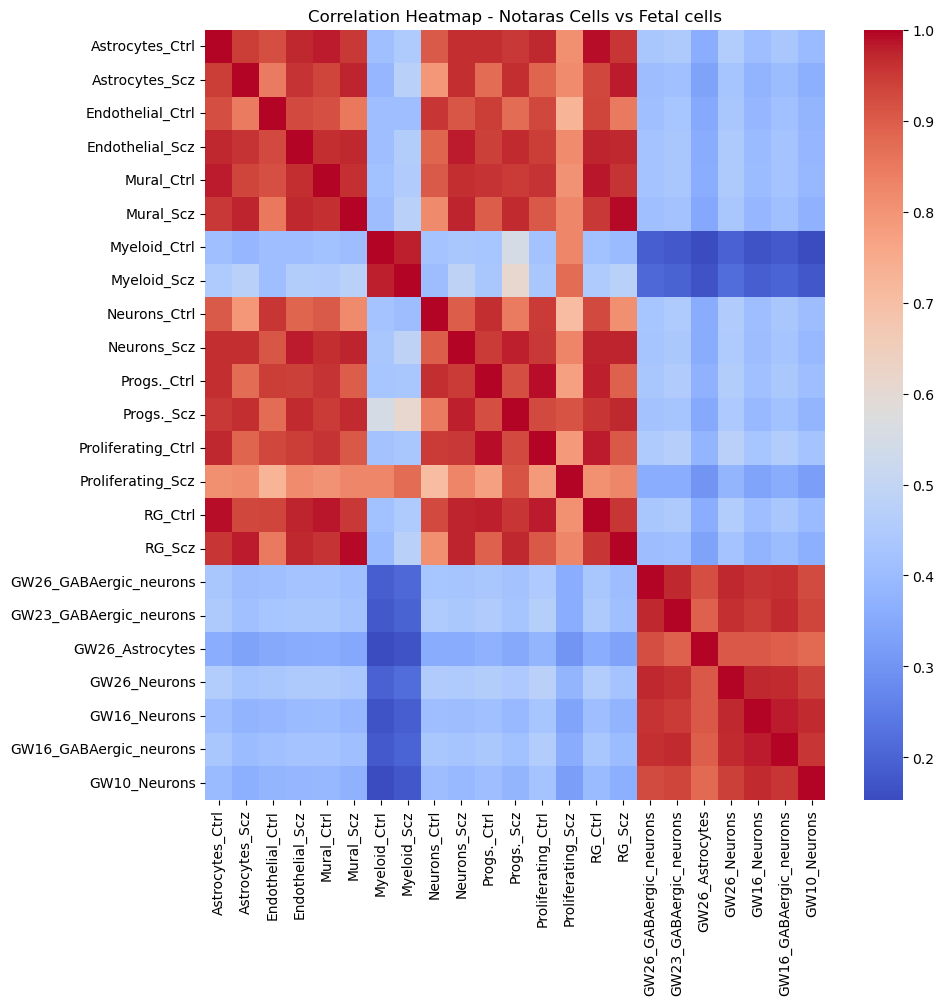

In [35]:
# Visualize correlation matrix in a heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix_cells, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap - Notaras Cells vs Fetal cells')
plt.show()

## TKT Expression in all Fetal Cells & Notaras Cell Types

In [3]:
os.chdir("C:/Users/fallo/OneDrive/Documents/URF_2023/Datasets")

In [6]:
all_fetal_cells = pd.read_csv('zhong_expression_all.csv', index_col=0)
# Rename column
all_fetal_cells['Gene_name'] = all_fetal_cells['SYMBOL']
all_fetal_cells.head()

,GENE,GW08_Neurons,GW08_Stem_cells,GW08_GABAergic_neurons,GW08_Microglia,GW09_Stem_cells,GW09_Neurons,GW09_GABAergic_neurons,GW10_Neurons,GW10_Stem_cells,...,GW23_Microglia,GW26_GABAergic_neurons,GW26_Astrocytes,GW26_Neurons,GW26_Microglia,GW26_OPC,GW26_Stem_cells,Average,SYMBOL,Gene_name
1,ENSG00000121410,0.164659,0.0,0.0,0.000000,0.055522,0.813748,0.0,1.046958,0.855689,...,0.000000,0.779467,0.262848,0.211275,0.343823,0.379978,0.00000,0.479064,A1BG,A1BG
2,ENSG00000268895,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.116426,0.121927,0.000000,0.230800,0.000000,0.00000,0.017904,A1BG-AS1,A1BG-AS1
3,ENSG00000148584,0.000000,0.0,0.0,0.000000,0.049346,0.000000,0.0,0.000000,0.041276,...,0.000000,0.086859,0.136653,0.127822,0.103129,0.039556,0.00000,0.024159,A1CF,A1CF
4,ENSG00000175899,1.360285,0.0,0.0,9.878978,0.386159,0.402109,0.0,0.386600,0.725723,...,10.095362,1.305558,1.250862,0.784650,9.344341,1.352859,2.71995,2.461425,A2M,A2M
5,ENSG00000245105,0.000000,0.0,0.0,0.836778,0.000000,0.000000,0.0,0.120538,0.107940,...,1.266793,0.188387,0.171241,0.291190,0.608301,0.145715,0.00000,0.171715,A2M-AS1,A2M-AS1


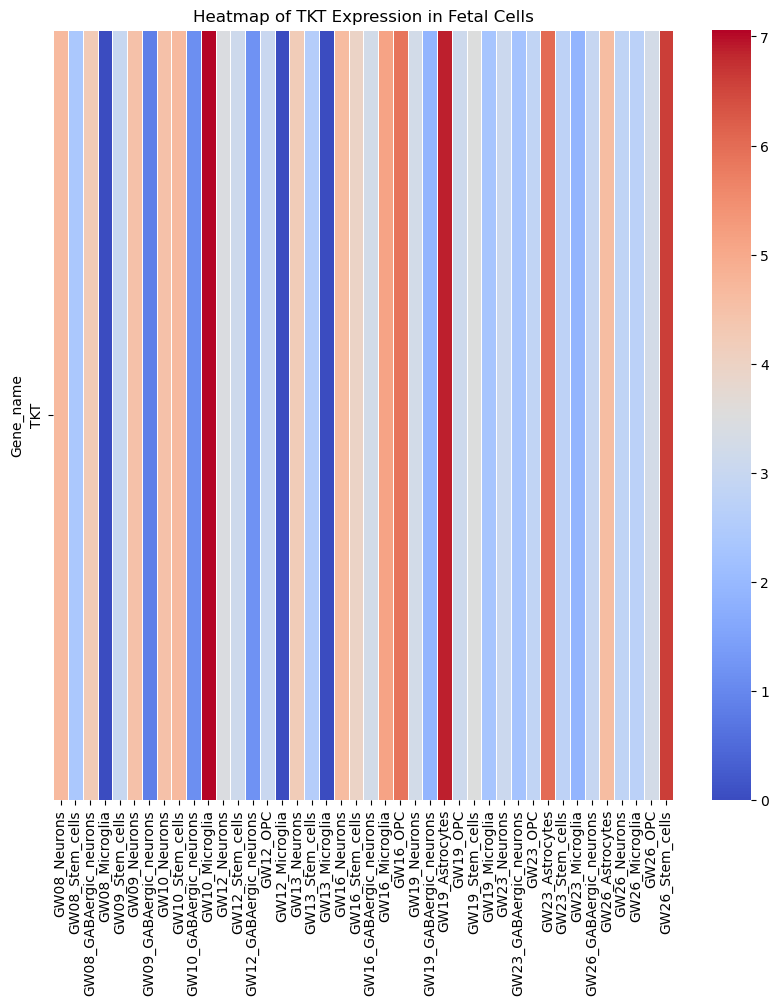

In [26]:
# Subset for the TKT gene
fetal_tkt = all_fetal_cells[all_fetal_cells['Gene_name'] == 'TKT']
# Remove 'GENE' column from df
fetal_tkt = fetal_tkt.drop(columns=['GENE', 'Average', 'SYMBOL'])

# Set 'Gene_name' column to the first position
fetal_tkt = fetal_tkt[['Gene_name'] + [col for col in fetal_tkt.columns if col != 'Gene_name']]
# Reset the index
fetal_tkt.reset_index(drop=True, inplace=True)
fetal_tkt.set_index('Gene_name', inplace=True)
fetal_tkt.head()

# Convert DataFrame to numeric format
fetal_tkt_numeric = fetal_tkt.apply(pd.to_numeric, errors='coerce')
# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(fetal_tkt_numeric, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add labels and title
plt.title('Heatmap of TKT Expression in Fetal Cells')

# Show the plot
plt.show()

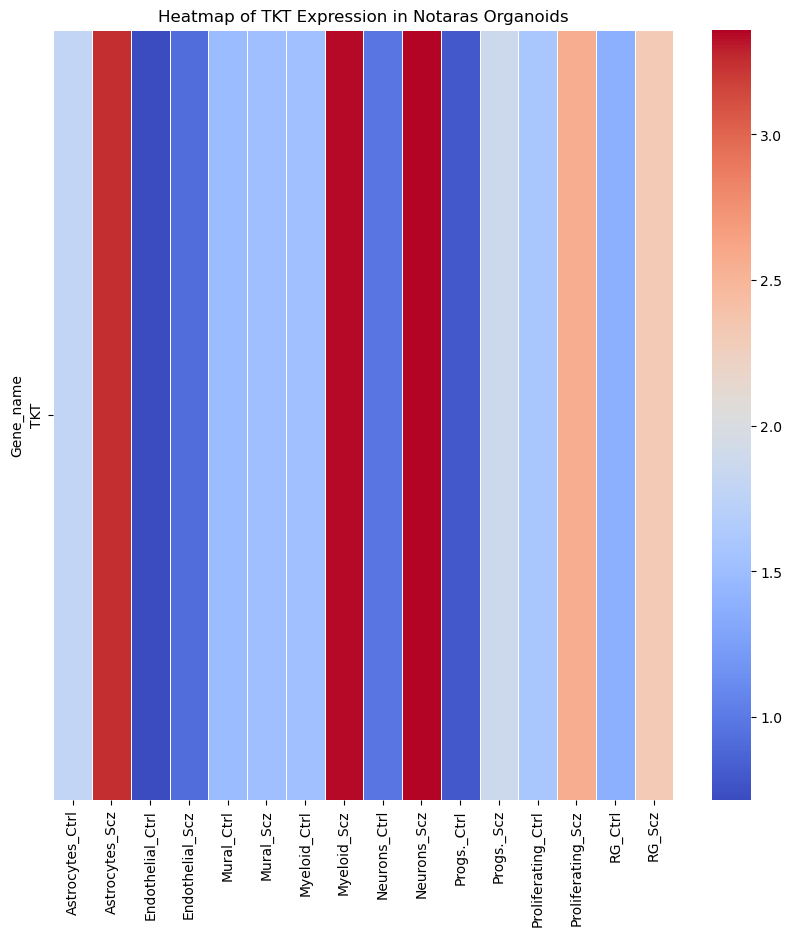

In [29]:
# Subset for the TKT gene
notaras_tkt = pivot_notaras.loc[['TKT']]
# Convert DataFrame to numeric format
notaras_tkt_numeric = notaras_tkt.apply(pd.to_numeric, errors='coerce')
# Plot the heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(notaras_tkt_numeric, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Add labels and title
plt.title('Heatmap of TKT Expression in Notaras Organoids')

# Show the plot
plt.show()